In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

#Load test file to see what's inside the files:
# file = uproot.open("ev{}.root".format(1))
file = uproot.open("NNDumper_tree.root")
tree = file["nndumper"]["evttree"] 
print("Contenido del TTree:")
tree.show()

Contenido del TTree:
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TPCImgDataU          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthU         | int32_t                  | AsDtype('>i4')
TPCImgHeightU        | int32_t                  | AsDtype('>i4')
TPCImgDataV          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthV         | int32_t                  | AsDtype('>i4')
TPCImgHeightV        | int32_t                  | AsDtype('>i4')
TPCImgDataY          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthY         | int32_t                  | AsDtype('>i4')
TPCImgHeightY        | int32_t                  | AsDtype('>i4')
OpImgData            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
OpImgWidth           | int32_t                  | AsDtype('>i4')
OpImgHeight          | int32_t        

In [2]:
#For big files, use lazy arrays instead -> Memory isn't infinite!

# lazyarray = uproot.lazy("ev{}.root".format(1)+":nndumper/evttree")
lazyarray = uproot.lazy("NNDumper_tree.root")
NEvents=len(lazyarray)
h_TPC=lazyarray[0]["TPCImgHeightU"]
w_Opt=lazyarray[0]["OpImgWidth"]
h_Opt=lazyarray[0]["OpImgHeight"]
i_type=lazyarray[0]["InteractionType"]
w_TPC=lazyarray[0]["TPCImgWidthU"]


print("Numero de eventos en el .root file: ",NEvents)
print("Tamaño de las imagenes de TPC:",w_TPC,"x",h_TPC)
print("Tamaño de las imagenes opticas:",w_Opt,"x",h_Opt)#hay 96 canales ópticos, pero por simplicidad para la CNN colapsamos los canales enfrentados en el mismo: ch(6+7)...->96/2=48
print("Nº de canales opticos de PMT coated (VUV+VIS):",len(lazyarray[0]["SimPhotonsData"].to_numpy()))
print("Tipo de interaccion:",i_type) #1001 CCQE, lo demás, backgrounds (mirar interaction.png, cada numero es una interacción distinta)

Numero de eventos en el .root file:  1
Tamaño de las imagenes de TPC: 248 x 200
Tamaño de las imagenes opticas: 48 x 600
Nº de canales opticos de PMT coated (VUV+VIS): 96
Tipo de interaccion: 1002


In [3]:
# np.sum(lazyarray[0]["OpImgData"])
np.sum(lazyarray[0]["TPCImgDataU"])


3229042.8

Imagen de TPC


<Figure size 432x288 with 0 Axes>

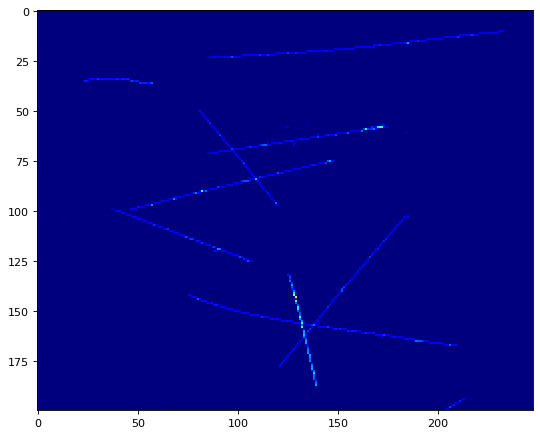

Imagen Optica


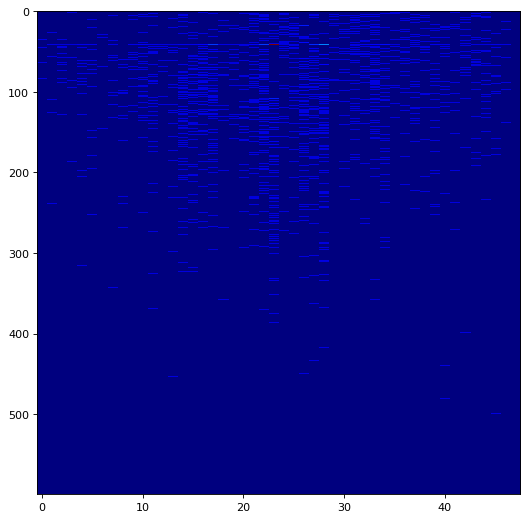

In [5]:
#Loop over the events in the run
# for i in range(NEvents):
for i in range(1):
    TPC_picture_root = lazyarray[i]["TPCImgDataU"]
    TPC_picture_nump =TPC_picture_root.to_numpy()

    Opt_picture_root = lazyarray[i]["OpImgData"]
    Opt_picture_nump =Opt_picture_root.to_numpy()

    fig = plt.figure();

    TPC_picture_matr =np.reshape(TPC_picture_nump,(h_TPC,w_TPC));
    Opt_picture_matr =np.reshape(Opt_picture_nump,(h_Opt,w_Opt));
    
    #Funciona!
    print("Imagen de TPC")
    plt.figure(figsize=(8, 8), dpi=80);
    plt.imshow(TPC_picture_matr,cmap = 'jet', interpolation='none');
    # plt.colorbar()
    plt.show();

    print("Imagen Optica")
    Opt_picture_matr[Opt_picture_matr==0]=-100;
    plt.figure(figsize=(8, 8), dpi=80);
    plt.imshow(Opt_picture_matr,cmap = 'jet', interpolation='none',aspect=w_Opt/h_Opt);
    plt.show();


